In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

height = 64
width = 64
image0 = np.zeros((height, width), dtype=np.uint8) 

def computehoughTransformCoord(x1, y1, x2, y2):

    if x1 == x2:
        return(np.pi/2, abs(y1-y2), abs(x1))

    k =  (y1 - y2) / (x1 - x2)
    theta = np.arctan(-k)

    A = y2 - y1
    B = x2 - x1
    C = abs(x2*y1 - x1*y2)
    length = np.sqrt(A**2 + B**2)
    rho = abs(C / length)
    
    return np.degrees(theta), length, rho

use lsd to detect

In [131]:
def simulateSigma(noise_std, low, high):

    height, width = image0.shape
    bound = int(width / 2)

    thetaT = 45
    rhoT = height/np.sqrt(2)-0.5

    for i in range(0, height):
        image0[i, 0: height-i] = low
        image0[i, height-i : height] = high

    lsd = cv2.createLineSegmentDetector(0)
    thetaList = []
    rhoList = []

    for _ in range(0, 1000):
        image = image0 + np.round(np.random.normal(0, noise_std, image0.shape)).astype(int)
        image = np.uint8(image)
        # cv2.imwrite("blur_image.png", image)

        lines, width, prec, nfa = lsd.detect(image)

        drawn_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        if lines is None:
            print("================empty lines=============")
        else:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                theta, length, rho = computehoughTransformCoord(x1, y1, x2, y2)

                if abs( rho - rhoT ) > 3 or abs(theta - thetaT) > 7:
                    continue

                thetaList.append(theta)
                rhoList.append(rho)

                x1, y1, x2, y2 = map(int, line[0])
                drawn_img = cv2.line(drawn_img, (x1, y1), (x2, y2), (0, 255, 0), 1, cv2.LINE_AA)
                # print(f"theta : {theta - thetaT}, rho : {rho - rhoT}")
            cv2.imwrite("drawn_img.png", drawn_img)

    thetaList = np.asarray(thetaList)
    rhoList = np.asarray(rhoList)
    thetaSigma = np.std(thetaList)
    rhoSigma = np.std(rhoList)
    # print(np.mean(rhoList))
    # print(thetaSigma, rhoSigma)
    return thetaSigma, rhoSigma

===========noise 0==========
===========noise 1==========
===========noise 2==========
===========noise 3==========
===========noise 4==========
===========noise 5==========
===========noise 6==========
===========noise 7==========
===========noise 8==========
===========noise 9==========
===========noise 10==========
===========noise 11==========
===========noise 12==========
===========noise 13==========
===========noise 14==========
===========noise 15==========
===========noise 16==========
===========noise 17==========
===========noise 18==========
===========noise 19==========
===========noise 20==========
===========noise 21==========
===========noise 22==========
===========noise 23==========
===========noise 24==========
===========noise 25==========
===========noise 26==========
===========noise 27==========
===========noise 28==========
===========noise 29==========


Text(0, 0.5, 'error_std')

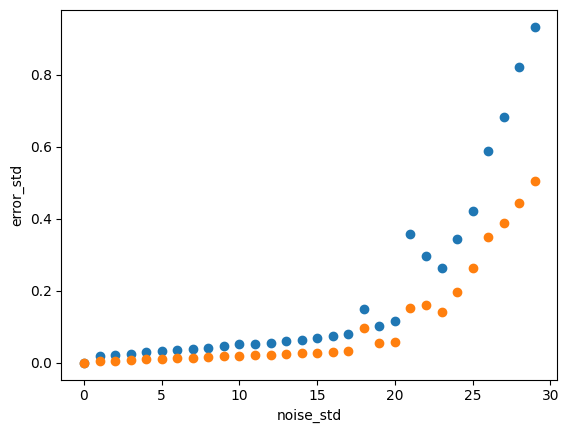

In [132]:
thetaSigmaList = []
rhoSigmaList = []
noiseList = range(0, 30)

for noise in noiseList:
    # print(f"===========noise {noise}==========")
    thetaSigma, rhoSigma = simulateSigma(noise, 70, 180)
    thetaSigmaList.append(thetaSigma)
    rhoSigmaList.append(rhoSigma)

plt.figure()
plt.scatter(noiseList, thetaSigmaList)
plt.scatter(noiseList, rhoSigmaList)
plt.xlabel("noise_std")
plt.ylabel("error_std")

In [133]:
# noise = 40
# thetaSigma, rhoSigma = simulateSigma(noise, 70, 180)

Text(0, 0.5, 'error_std')

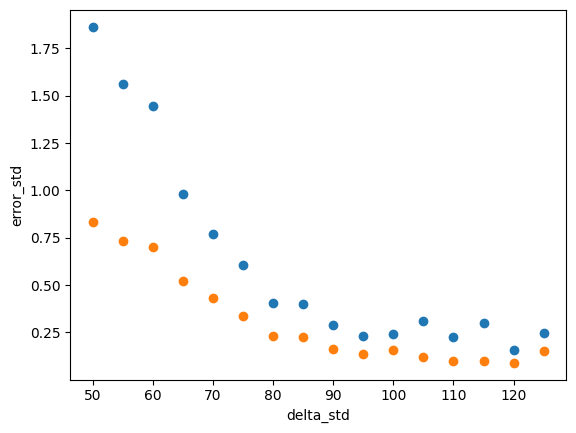

In [134]:
thetaSigmaList = []
rhoSigmaList = []
deltaList = range(50, 130, 5)

for delta in deltaList:
    # print(f"===========delta {delta}==========")
    thetaSigma, rhoSigma = simulateSigma(20, 70, 70 + delta)
    thetaSigmaList.append(thetaSigma)
    rhoSigmaList.append(rhoSigma)

plt.figure()
plt.scatter(deltaList, thetaSigmaList)
plt.scatter(deltaList, rhoSigmaList)
plt.xlabel("delta_std")
plt.ylabel("error_std")

In [135]:
print(simulateSigma(20, 70, 200))

(0.24551077, 0.1173011484170249)
